#Τα δεδομένα έγιναν scraped από το πρώτο θέμα για το tag "γλυκά νερά"

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

#download webdriver from https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/
#and put the executable in /usr/local/bin

In [ ]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.protothema.gr/tag/eglima-sta-gluka-nera/")


    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 7432
height: 10653
height: 14012
height: 17221
height: 20579
height: 23919
height: 27438
height: 30775
height: 33883
height: 37469
height: 40802
height: 44020
OK


In [ ]:

soup = BeautifulSoup(driver.page_source, "html.parser")

In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [ ]:

print(len(stories_list))

182


In [ ]:

import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

,headline,url,date
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01T12:45:00+03:00
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30T11:55:00+03:00
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30T09:14:00+03:00
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29T20:40:00+03:00
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29T18:27:00+03:00
...,...,...,...
177,\nΓλυκά Νερά: Επέστρεψε στο σπίτι ο σύζυγος τη...,https://www.protothema.gr/greece/article/11270...,2021-05-24T20:13:00+03:00
178,\nΈγκλημα στα Γλυκά Νερά: Ποια στοιχεία αποδεί...,https://www.protothema.gr/greece/article/11267...,2021-05-24T06:50:00+03:00
179,\n Γλυκά Νερά: Στο μικροσκόπιο τα στοιχεία από...,https://www.protothema.gr/greece/article/11267...,2021-05-23T21:39:00+03:00
180,\nΈγκλημα στα Γλυκά Νερά: Το σκίτσο του «κοντο...,https://www.protothema.gr/greece/article/11265...,2021-05-23T10:24:47+03:00


In [ ]:
df.sort_values(by='date', ascending = False)

,headline,url,date
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01T12:45:00+03:00
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30T11:55:00+03:00
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30T09:14:00+03:00
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29T20:40:00+03:00
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29T18:27:00+03:00
...,...,...,...
177,\nΓλυκά Νερά: Επέστρεψε στο σπίτι ο σύζυγος τη...,https://www.protothema.gr/greece/article/11270...,2021-05-24T20:13:00+03:00
178,\nΈγκλημα στα Γλυκά Νερά: Ποια στοιχεία αποδεί...,https://www.protothema.gr/greece/article/11267...,2021-05-24T06:50:00+03:00
179,\n Γλυκά Νερά: Στο μικροσκόπιο τα στοιχεία από...,https://www.protothema.gr/greece/article/11267...,2021-05-23T21:39:00+03:00
180,\nΈγκλημα στα Γλυκά Νερά: Το σκίτσο του «κοντο...,https://www.protothema.gr/greece/article/11265...,2021-05-23T10:24:47+03:00


In [ ]:
df.tail()

,headline,url,date
177,\nΓλυκά Νερά: Επέστρεψε στο σπίτι ο σύζυγος τη...,https://www.protothema.gr/greece/article/11270...,2021-05-24T20:13:00+03:00
178,\nΈγκλημα στα Γλυκά Νερά: Ποια στοιχεία αποδεί...,https://www.protothema.gr/greece/article/11267...,2021-05-24T06:50:00+03:00
179,\n Γλυκά Νερά: Στο μικροσκόπιο τα στοιχεία από...,https://www.protothema.gr/greece/article/11267...,2021-05-23T21:39:00+03:00
180,\nΈγκλημα στα Γλυκά Νερά: Το σκίτσο του «κοντο...,https://www.protothema.gr/greece/article/11265...,2021-05-23T10:24:47+03:00
181,\nΓλυκά Νερά: Οι αρχές έχουν το σκίτσο του ενό...,https://www.protothema.gr/greece/article/11265...,2021-05-22T22:31:53+03:00


In [ ]:
df.to_csv("glykanera.csv", index=False)

In [ ]:
df.to_csv(r'C:\Users\Admin\Desktop\file3.csv', index=False)

#2. Καθάρισμα δεδομένων

In [ ]:
#ημερομηνίες --> datetime

In [ ]:
from datetime import timedelta
from datetime import datetime as dt

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

,headline,url,date
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01 12:45:00+03:00
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30 11:55:00+03:00
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30 09:14:00+03:00
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29 20:40:00+03:00
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29 18:27:00+03:00
...,...,...,...
177,\nΓλυκά Νερά: Επέστρεψε στο σπίτι ο σύζυγος τη...,https://www.protothema.gr/greece/article/11270...,2021-05-24 20:13:00+03:00
178,\nΈγκλημα στα Γλυκά Νερά: Ποια στοιχεία αποδεί...,https://www.protothema.gr/greece/article/11267...,2021-05-24 06:50:00+03:00
179,\n Γλυκά Νερά: Στο μικροσκόπιο τα στοιχεία από...,https://www.protothema.gr/greece/article/11267...,2021-05-23 21:39:00+03:00
180,\nΈγκλημα στα Γλυκά Νερά: Το σκίτσο του «κοντο...,https://www.protothema.gr/greece/article/11265...,2021-05-23 10:24:47+03:00


In [ ]:
df['year'] = df['date'].dt.strftime('%Y')

In [ ]:
df.sort_values(by=['date'], inplace=True, ascending=False)

In [ ]:
df[df['date'].notna()]

,headline,url,date,year
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01 12:45:00+03:00,2021
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30 11:55:00+03:00,2021
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30 09:14:00+03:00,2021
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29 20:40:00+03:00,2021
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29 18:27:00+03:00,2021
...,...,...,...,...
177,\nΓλυκά Νερά: Επέστρεψε στο σπίτι ο σύζυγος τη...,https://www.protothema.gr/greece/article/11270...,2021-05-24 20:13:00+03:00,2021
178,\nΈγκλημα στα Γλυκά Νερά: Ποια στοιχεία αποδεί...,https://www.protothema.gr/greece/article/11267...,2021-05-24 06:50:00+03:00,2021
179,\n Γλυκά Νερά: Στο μικροσκόπιο τα στοιχεία από...,https://www.protothema.gr/greece/article/11267...,2021-05-23 21:39:00+03:00,2021
180,\nΈγκλημα στα Γλυκά Νερά: Το σκίτσο του «κοντο...,https://www.protothema.gr/greece/article/11265...,2021-05-23 10:24:47+03:00,2021


#sentiment analysis

In [ ]:
df.to_csv("glyka.nera.csv", index=False)

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
df[df['date']==2020 ]['headline']

Series([], Name: headline, dtype: object)

In [ ]:
text = df['headline'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = df[df['date']==2021 ]['headline'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['κάμποσους',
 'εκείνου',
 'όσων',
 'αλλαχού',
 'ποιοί',
 'ευτυχώς',
 'μόνη',
 'πρώτος',
 'τόσους',
 'όσο',
 'τέτοιες',
 'τάδε',
 'άλλον',
 'απόψε',
 'στις',
 'ιδίας',
 'όπου',
 'ετούτους',
 'τόσο',
 'μία']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
df['headline'] = df['headline'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
df.head()

,headline,url,date,year
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01 12:45:00+03:00,2021
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30 11:55:00+03:00,2021
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30 09:14:00+03:00,2021
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29 20:40:00+03:00,2021
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29 18:27:00+03:00,2021


In [ ]:
df.head()

,headline,url,date,year
0,"\nΈγκλημα στα Γλυκά Νερά: Και όμως, ο φονιάς ...",https://www.protothema.gr/greece/article/11390...,2021-07-01 12:45:00+03:00,2021
1,\nΔικηγόρος οικογένειας Καρολάιν: Η μικρή Λυδί...,https://www.protothema.gr/greece/article/11386...,2021-06-30 11:55:00+03:00,2021
2,"\nΑναγνωστόπουλος: Δεν ταξίδεψα στη Σούδα, δεν...",https://www.protothema.gr/greece/article/11386...,2021-06-30 09:14:00+03:00,2021
3,\nΣτην αγκαλιά της γιαγιάς της στην Αλόννησο η...,https://www.protothema.gr/greece/article/11385...,2021-06-29 20:40:00+03:00,2021
4,\nΈφτασε στην Αλόννησο η μικρή Λυδία με τη μητ...,https://www.protothema.gr/greece/article/11384...,2021-06-29 18:27:00+03:00,2021


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:

count_vector.shape

(182, 807)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,000,10,18χρονη,20χρονη,20χρονης,300,32χρονο,32χρονος,32χρονου,37,daily,dna,eισαγγελία,eκπρόσωπος,facebook,gr,instagram,mail,media,new,post,protothema,revolver,smart,smartphone,smartwatch,social,sun,to,twitter,vip,watch,york,άγρια,άγριος,άκουσα,άκουσαν,άνδρας,άρον,άρση,...,φόβο,φόνο,φόνος,φύγω,χέρια,χαλάσει,χαρούμενη,χειροπέδες,χθες,χιλιάδες,χλωρίνη,χριστοδουλάκης,χρυσηίδα,χρυσηίδας,χρόνια,χτυπήσει,χυδαία,χωρίς,ψάχνουν,ψευδών,ψοφήσετε,ψυχής,ψυχίατρος,ψυχικής,ψυχολόγο,ψυχολόγος,ψυχολόγου,ψυχολόγων,ψυχοσυναισθηματική,ψύχραιμος,ως,όμως,όσα,όταν,ότι,όχημα,όχι,ύποπτο,ύποπτος,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['headline'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,20χρονη,32χρονο,32χρονος,32χρονου,37,daily,instagram,mail,media,smartwatch,social,έγκλημα,έγραφε,έδειξαν,έδειξε,έκανα,έρευνα,αγγελική,αγκαλιά,αδιανόητη,αλόννησο,ανάρτηση,αναγνωστόπουλος,αναγνωστόπουλου,ανακριτή,ανθρωποκτονιών,αντιδράσεις,απάντηση,απολογία,απόδοση,απόφαση,αρχές,αστυνομία,αστυνομικοί,αστυνομικού,αστυνομικούς,αυτοκίνητο,βίντεο,βρετανικά,γάμο,...,πιλότο,πιλότος,πιλότου,ποινικός,προβλέπει,προκλητική,προσωρινή,πτέρυγα,σήμερα,σενάρια,σκίτσο,σκηνές,σκότωσα,σκότωσε,σκύλου,σούδα,σπίτι,στοιχεία,συγγνώμη,συγκλονίζει,συγκλονιστική,συζυγοκτόνο,συζυγοκτόνου,συνηγόρους,σύζυγος,σύζυγό,τάφο,υπόθεση,φυλακές,φυλακή,φωτογραφία,φόνο,φύγω,χέρια,χιλιάδες,ψυχολόγος,ψυχολόγου,ψυχολόγων,ύποπτο,ώρες
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#######

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστα', 'εκάστο', 'ετέρο', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτά', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύ', 'ταύτε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,20χρονη,32χρονος,daily,instagram,mail,media,smartwatch,social,έγκλημας,έγραφε,έδειξαν,έδειξε,έκανας,έρευνα,αγγελικός,αγκαλιά,αδιανόητη,αλόννησο,ανάρτηση,αναγνωστόπουλο,αναγνωστόπουλου,ανακριτή,ανθρωποκτονία,αντιδράσει,απάντηση,απολογία,αποφασίζω,απόδοση,απόφαση,αρχές,αστυνομία,αστυνομικού,αστυνομικός,βίντεο,βασικός,βλέπω,βρετανικά,γάμο,γίνω,...,πιλότο,πιλότος,ποινή,ποινικός,προβλέπω,προκλητικός,προσωρινός,πτέρυγα,σήμερα,σενάρι,σκέφτομαι,σκίτσο,σκηνός,σκότωσας,σκότωσε,σκύλο,σούδα,σπίτι,στοιχείο,συγγνώμη,συγκινώ,συγκλονίζω,συγκλονιστικός,συζυγοκτόνο,συνηγόρου,σύζυγος,σύζυγό,τάφο,υπόθεση,φυλακή,φυλακός,φωτογραφία,φόνο,φύγω,χέρι,χιλιάδες,ψυχολόγο,ψυχολόγος,ύποπτος,ώρες
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,32χρονος,έγκλημα,αναγνωστόπουλου,γλυκά,δικηγόρος,δολοφονία,δολοφόνο,επιμέλεια,καρολάιν,λέει,λυδία,λυδίας,μητέρα,μπάμπη,μπάμπης,νερά,πιλότο,πιλότος,πιλότου,σπίτι
0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,32χρονο πιλότο,32χρονος πιλότος,32χρονου πιλότου,37 μέρες,έγκλημα γλυκά,γλυκά νερά,δικηγόρος οικογένειας,δολοφονία καρολάιν,δολοφόνο καρολάιν,δολοφόνου καρολάιν,επιμέλεια μικρής,μητέρα καρολάιν,μικρή λυδία,μικρής λυδίας,μπάμπη αναγνωστόπουλου,νερά φωτογραφία,οικογένειας καρολάιν,σύζυγος καρολάιν,ψυχολόγος καρολάιν,ψυχολόγου καρολάιν
0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά                118
έγκλημα γλυκά              72
δολοφονία καρολάιν         10
32χρονος πιλότος            8
μητέρα καρολάιν             8
μικρή λυδία                 7
μικρής λυδίας               5
επιμέλεια μικρής            5
δολοφόνου καρολάιν          4
οικογένειας καρολάιν        4
νερά φωτογραφία             4
μπάμπη αναγνωστόπουλου      4
ψυχολόγος καρολάιν          4
32χρονου πιλότου            3
37 μέρες                    3
ψυχολόγου καρολάιν          3
δικηγόρος οικογένειας       3
δολοφόνο καρολάιν           3
σύζυγος καρολάιν            3
32χρονο πιλότο              3
dtype: int64

In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

γλυκά νερά            118
έγκλημα γλυκά          72
δολοφονία καρολάιν     10
32χρονος πιλότος        8
μητέρα καρολάιν         8
dtype: int64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά                118
έγκλημα γλυκά              72
δολοφονία καρολάιν         10
32χρονος πιλότος            8
μητέρα καρολάιν             8
μικρή λυδία                 7
μικρής λυδίας               5
επιμέλεια μικρής            5
δολοφόνου καρολάιν          4
οικογένειας καρολάιν        4
νερά φωτογραφία             4
μπάμπη αναγνωστόπουλου      4
ψυχολόγος καρολάιν          4
32χρονου πιλότου            3
37 μέρες                    3
ψυχολόγου καρολάιν          3
δικηγόρος οικογένειας       3
δολοφόνο καρολάιν           3
σύζυγος καρολάιν            3
32χρονο πιλότο              3
dtype: int64

In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['γλυκά νερά', 'έγκλημα γλυκά ']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,γλυκά νερά,έγκλημα γλυκά
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
sum_words.sort_values(ascending = False).head(17)

γλυκά νερά                118
έγκλημα γλυκά              72
δολοφονία καρολάιν         10
32χρονος πιλότος            8
μητέρα καρολάιν             8
μικρή λυδία                 7
μικρής λυδίας               5
επιμέλεια μικρής            5
δολοφόνου καρολάιν          4
οικογένειας καρολάιν        4
νερά φωτογραφία             4
μπάμπη αναγνωστόπουλου      4
ψυχολόγος καρολάιν          4
32χρονου πιλότου            3
37 μέρες                    3
ψυχολόγου καρολάιν          3
δικηγόρος οικογένειας       3
dtype: int64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

#πιο συχνες λεξεις

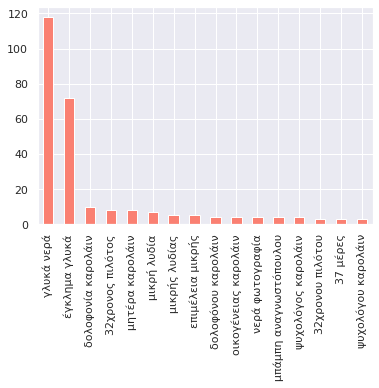

In [ ]:
most_common.plot(kind='bar',color='salmon')

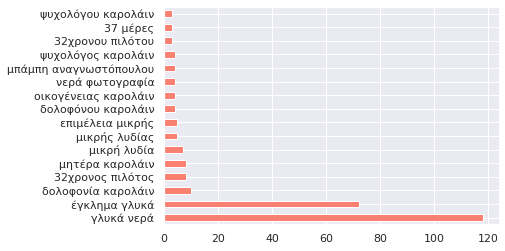

In [ ]:
most_common.plot(kind='barh',color='salmon')

In [ ]:
##################################

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['headline'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,000,10,18χρονη,20χρονη,20χρονης,300,32χρονο,32χρονος,32χρονου,37,daily,dna,instagram,mail,media,smartwatch,social,to,twitter,vip,watch,york,άγρια,άγριος,άκουσα,άκουσαν,άνδρας,άρον,άρση,άτομο,έβαλε,έβγαιναν,έβλεπα,έγκλημα,έγραφε,έδειξαν,έδειξε,έκανα,έκαναν,έκαψε,...,φρίκης,φραντζή,φυλακές,φυλακή,φως,φωτογραφία,φωτογραφίες,φωτό,φόβο,φόνο,φόνος,φύγω,χέρια,χαλάσει,χαρούμενη,χειροπέδες,χθες,χιλιάδες,χλωρίνη,χριστοδουλάκης,χρυσηίδα,χρυσηίδας,χρόνια,χτυπήσει,χυδαία,ψάχνουν,ψευδών,ψοφήσετε,ψυχής,ψυχίατρος,ψυχικής,ψυχολόγο,ψυχολόγος,ψυχολόγου,ψυχολόγων,ψυχοσυναισθηματική,ψύχραιμος,όχημα,ύποπτο,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.195891,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.25700553 0.         0.28360359 0.39421783 0.25885986
  0.         0.12415594 0.06118751 0.23006214 0.12628736 0.03558013
  0.03902409 0.03448831 0.29557278 0.         0.09172133 0.0961933
  0.         0.07486275 0.         0.         0.10974783 0.31351221
  0.07419526 0.         0.03348344 0.         0.05055336 0.
  0.06795974 0.04000272 0.0293364  0.09075189 0.06741326 0.
  0.07503297 0.         0.10262609 0.03111261 0.         0.06279364
  0.03959386 0.06978198 0.07783003 0.         0.         0.04444035
  0.06882709 0.03351859 0.         0.0651149  0.         0.
  0.06561256 0.04219524 0.         0.04172975 0.         0.0680418
  0.12100546 0.         0.0665963  0.         0.         0.06782406
  0.09970935 0.03841254 0.09142476 0.         0.04173145 0.06026941
  0.07214953 0.02915829 0.0829771  0.03187381 0.         0.04084524
  0.06978198 0.04440988 0.         0.03576718 0.         0.07478324
  0.09415429 0.         0.0794447  0.03218039 0.0288548

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.25700553 0.         ... 0.03519465 0.10252608 0.0413503 ]
 [0.25700553 1.         0.0182938  ... 0.         0.         0.0222    ]
 [0.         0.0182938  1.         ... 0.         0.         0.02182389]
 ...
 [0.03519465 0.         0.         ... 1.         0.0442085  0.03365006]
 [0.10252608 0.         0.         ... 0.0442085  1.         0.38351107]
 [0.0413503  0.0222     0.02182389 ... 0.03365006 0.38351107 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

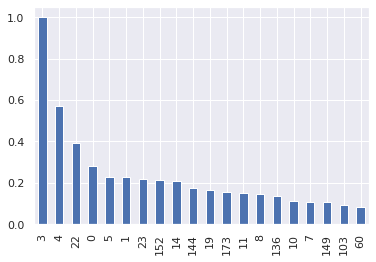

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


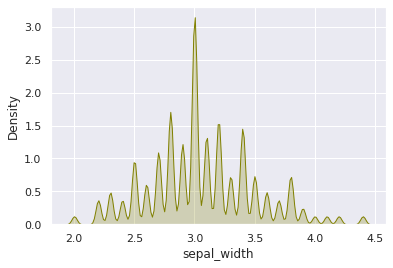

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
df = sns.load_dataset('iris')

# Narrower bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=0.05, color='olive') # if using seaborn < 0.11.0
plt.show()